In [6]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
#from tensorflow.keras.optimizers import sgd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [22]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [23]:
print(x_train.shape)

(60000, 28, 28)


In [24]:
x_train=x_train/255
x_test=x_test/255

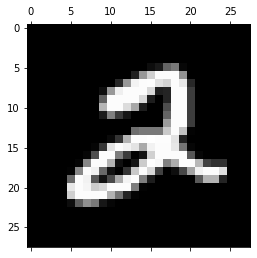

In [25]:
plt.matshow(x_train[5], cmap=plt.get_cmap('gray'))

In [26]:
x_train= x_train.reshape((x_train.shape + (1,)))
x_test = x_test.reshape((x_test.shape + (1,)))

In [27]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [30]:
model = Sequential ([
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
]
)

In [34]:
from tensorflow.keras.optimizers import SGD
optimizer= SGD(learning_rate=0.01, momentum=0.9)

In [36]:
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [44]:
model_log= model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 8.7440e-04 - accuracy: 0.9999
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 5.4644e-04 - accuracy: 1.0000
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 3.8546e-04 - accuracy: 1.0000
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 3.4073e-04 - accuracy: 1.0000
Epoch 10/10
1875/1875 [=========================

In [45]:
predictions=np.argmax(model.predict(x_test), axis=-1)

In [46]:
accuracy_score(y_test, predictions)

0.989

In [47]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0481 - accuracy: 0.9890: 0s - loss: 0.0490 - accuracy: 


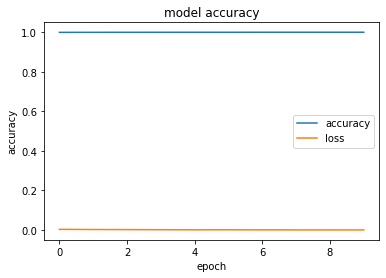

In [49]:
plt.plot(model_log.history['accuracy'], label='accuracy')
plt.plot(model_log.history['loss'],label='loss')
plt.title('model accuracy')
plt.legend(['accuracy','loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [51]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict, axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print("confusion matrix of test set \n", confusion_matrix )

confusion matrix of test set 
 tf.Tensor(
[[ 974    0    0    1    0    1    0    1    2    1]
 [   0 1129    1    1    0    0    2    1    1    0]
 [   1    1 1017    0    2    0    1    6    4    0]
 [   0    0    1 1000    0    4    0    3    1    1]
 [   0    0    2    0  973    0    1    1    1    4]
 [   1    0    0    8    0  881    1    0    1    0]
 [   5    3    0    0    1    1  948    0    0    0]
 [   0    0    3    2    0    0    0 1023    0    0]
 [   6    0    2    0    0    1    0    3  956    6]
 [   1    2    0    2    7    2    0    4    2  989]], shape=(10, 10), dtype=int32)
